In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("AirlineOccurences.csv")
df.head()

,Report,Part Failure,Occurence Nature condition,Occurence Precautionary Procedures
0,MECHANICAL / LANDING GEAR GND FAIL MSG AFTER T...,RT MLG BRAKE DAMAGED,WARNING INDICATION,OTHER
1,THE NOSE LANDING GEAR DID NOT EXTEND FULLY DUR...,ZONE 700 MALFUNCTIONED,WARNING INDICATION,ABORTED APPROACH
2,THE LEFT SIDE HYDRAULIC SYSTEM FILTER BOWL ASS...,HYD FILTER FAILED,OTHER,ABORTED APPROACH
3,AIRCRAFT WAS ON ROLLOUT DURING A NORMAL LANDIN...,LEFT COLLAPSED,OTHER,OTHER
4,UPON TAKEOFF ROLL BUT PRIOR TO REACHING 80 KNO...,ZONE 600 CRACKED,WARNING INDICATION,ABORTED TAKEOFF


In [14]:
df.shape

(100028, 4)

In [15]:
df.dtypes

Report                                object
Part Failure                          object
Occurence Nature condition            object
Occurence Precautionary Procedures    object
dtype: object

In [16]:
# renaming columns
df.rename({"Report":"report", "Part Failure": "part_failure", "Occurence Nature condition": "occurence_nature_condition", 
           "Occurence Precautionary Procedures": "occurence_precautionary_procedures"}, axis=1, inplace=True)
df.head()

,report,part_failure,occurence_nature_condition,occurence_precautionary_procedures
0,MECHANICAL / LANDING GEAR GND FAIL MSG AFTER T...,RT MLG BRAKE DAMAGED,WARNING INDICATION,OTHER
1,THE NOSE LANDING GEAR DID NOT EXTEND FULLY DUR...,ZONE 700 MALFUNCTIONED,WARNING INDICATION,ABORTED APPROACH
2,THE LEFT SIDE HYDRAULIC SYSTEM FILTER BOWL ASS...,HYD FILTER FAILED,OTHER,ABORTED APPROACH
3,AIRCRAFT WAS ON ROLLOUT DURING A NORMAL LANDIN...,LEFT COLLAPSED,OTHER,OTHER
4,UPON TAKEOFF ROLL BUT PRIOR TO REACHING 80 KNO...,ZONE 600 CRACKED,WARNING INDICATION,ABORTED TAKEOFF


In [47]:
print(df.isnull().sum())

report                                0
part_failure                          0
occurence_nature_condition            0
occurence_precautionary_procedures    0
dtype: int64


In [17]:
df["occurence_precautionary_procedures"].unique()

array(['OTHER                   ', 'ABORTED APPROACH        ',
       'ABORTED TAKEOFF         ', 'EMER. DESCENT           ',
       'O2 MASK DEPLOYED        ', 'UNSCHED LANDING         ',
       'NONE                    ', 'RETURN TO BLOCK         ',
       'DEACTIVATE SYST/CIRCUITS', 'ENGINE SHUTDOWN         ',
       'DUMP FUEL               ', 'ACTIVATE FIRE EXT.      ',
       'CABIN DEPRESSURIZATION  ', 'AUTOROTATION            '],
      dtype=object)

In [18]:
df["part_failure"].unique()

array(['RT MLG BRAKE DAMAGED         ', 'ZONE 700 MALFUNCTIONED   ',
       'HYD FILTER FAILED          ', ..., '7501MM FAILED INSP     ',
       '10GG FAILED          ', '5QT FAILED          '], dtype=object)

In [19]:
df["occurence_nature_condition"].unique()

array(['WARNING INDICATION        ', 'OTHER                     ',
       'ENGINE FLAMEOUT           ', 'ELECT. POWER LOSS-50 PC   ',
       'SMOKE/FUMES/ODORS/SPARKS  ', 'FLUID LOSS                ',
       'FALSE WARNING             ', 'NO TEST                   ',
       'PARTIAL RPM/PWR LOSS      ', 'VIBRATION/BUFFET          ',
       'AFFECT SYSTEMS            ', 'FLT CONT AFFECTED         ',
       'MULTIPLE FAILURE          ', 'SIGNIFICANT FAILURE REPORT',
       'INADEQUATE Q C            ', 'NO WARNING INDICATION     ',
       'OVER TEMP                 ', 'FLT. ATTITUDE INST.       ',
       'F.O.D.                    ', 'FLAME/FIRE                ',
       'INFLIGHT SEPARATION       ', 'ENGINE STOPPAGE           '],
      dtype=object)

In [20]:
# report has too many unique values and upon closer inspection of the data it will be too difficult to categorize them, 
# so we will not use it in our model
df["report"].unique()

array(['MECHANICAL / LANDING GEAR GND FAIL MSG AFTER TAKEOFF EMERGENCY DECLARED- BRAKE OVERHEAT CAUTION MESSAGE. ERRATIC RT INBOARD - PEGGED AT MAX TEMP -MEL 3203 AUTH 060159DM-C AML 4764592 ITEM 1.-C/A-TROUBLESHOT RH MLG BRAKE TEMP INDICATION HARNESS IAW SWPM 20-20-03. NO TIME TO FIX. UPDATED KVA. MEL CONTINUES. M PROCEDURES RE-COMPLIED WITH.',
       'THE NOSE LANDING GEAR DID NOT EXTEND FULLY DURING APPROACH AS WAS SEEN BY THE INSPECTION MIRROR.  THE PILOT ABORTED THE APPROACH AND IN TROUBLESHOOTING EXTENDED THE LANDING GEAR TO THE FULLY LOCKED POSITION WITH THE MANUAL EXTENSION HAND PUMP.  THE LANDING GEAR HANDLE RETURNED TO NEUTRAL.  THE PILOT STATED THAT USING NORMAL PROCEDURES, THE NOSE GEAR DID NOT EXTEND OR RETRACT AND THE GEAR HANDLE DID NOT RETURN TO NEUTRAL.  THE LANDING WAS UNEVENTFUL.  THE PLANE WAS REPOSITIONED WITH THE LANDING GEAR DOWN TO THE MAIN MAINTENANCE FACILITY.  IN MAINTENANCE THE CONDITION COULD NOT BE REPRODUCED.  THE LANDING GEAR WAS CHECKED FOR PROPER SERVI

In [21]:
# all values are in all caps so we can keep it that way

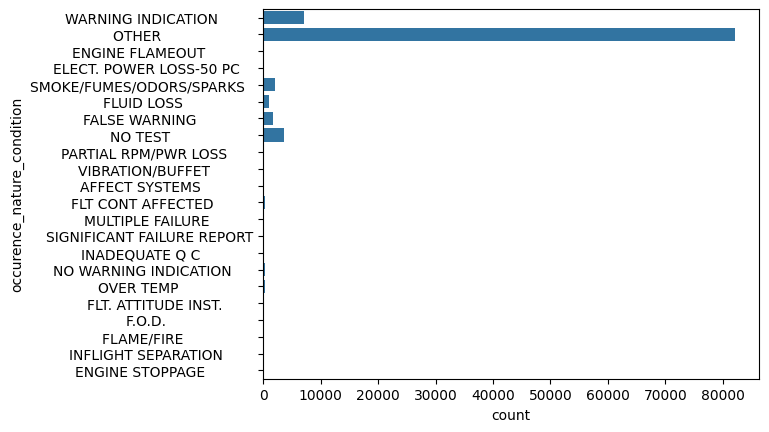

In [31]:
sns.countplot(data=df["occurence_nature_condition"])
plt.show()

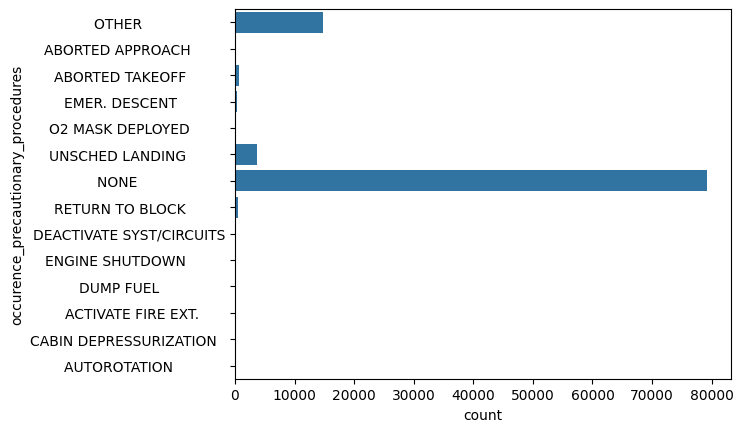

In [33]:
sns.countplot(data=df["occurence_precautionary_procedures"])
plt.show()

In [46]:
df["part_failure"].value_counts()

part_failure
FUSELAGE CRACKED                     1998
ZONE 100 CORRODED                    1926
FUSELAGE CORRODED                    1843
EMERGENCY LIGHTS INOPERATIVE         1272
ZONE 200 CORRODED                    1145
                                     ... 
CABIN LIGHT LOOSE                       1
EVAPORATOR SMOKE                        1
COCKCPIT ODOR                           1
STATION 6541 CHAFED                     1
5QT FAILED                              1
Name: count, Length: 25088, dtype: int64